In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [58]:
df_echonest = pd.read_csv('../DataBase/raw/echonest_features.tsv', sep='\t')
df_spectral = pd.read_csv('../DataBase/raw/spectral_features.tsv', sep='\t')
df_tracks = pd.read_csv('../DataBase/raw/tracks.tsv', sep='\t')
df_genres = pd.read_csv('../DataBase/raw/genres.csv')

In [59]:
print('Echonest shape:', df_echonest.shape)
print('Spectral shape:', df_spectral.shape)
print('Tracks shape:', df_tracks.shape)
print('Genres shape:', df_genres.shape)

Echonest shape: (11440, 9)
Spectral shape: (99995, 22)
Tracks shape: (99995, 14)
Genres shape: (164, 5)


# Flatten Column Names

In [60]:
if isinstance(df_tracks.columns, pd.MultiIndex):
    df_tracks.columns = ['_'.join(col).strip() for col in df_tracks.columns.values]

if isinstance(df_spectral.columns, pd.MultiIndex):
    df_spectral.columns = ['_'.join(col).strip() for col in df_spectral.columns.values]

if isinstance(df_echonest.columns, pd.MultiIndex):
    df_echonest.columns = ['_'.join(col).strip() for col in df_echonest.columns.values]

if isinstance(df_genres.columns, pd.MultiIndex):
    df_genres.columns = ['_'.join(col).strip() for col in df_genres.columns.values]

print('Columns flattened')

Columns flattened


In [61]:
print('Tracks columns:', df_tracks.columns.tolist()[:10])
print('Spectral columns:', df_spectral.columns.tolist()[:10])
print('Echonest columns:', df_echonest.columns.tolist()[:10])
print('Genres columns:', df_genres.columns.tolist())

Tracks columns: ['track_id', 'album_title', 'album_tracks', 'artist_latitude', 'artist_longitude', 'artist_name', 'duration', 'favorites', 'genre_top', 'genres']
Spectral columns: ['track_id', 'spectral_bandwidth_kurtosis_01', 'spectral_bandwidth_max_01', 'spectral_bandwidth_mean_01', 'spectral_bandwidth_median_01', 'spectral_bandwidth_min_01', 'spectral_bandwidth_skew_01', 'spectral_bandwidth_std_01', 'spectral_centroid_kurtosis_01', 'spectral_centroid_max_01']
Echonest columns: ['track_id', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']
Genres columns: ['genre_id', 'genre_color', 'genre_handle', 'genre_parent_id', 'genre_title']


In [62]:
df_tracks.columns = df_tracks.columns.str.lower().str.replace(' ', '_').str.replace('[^a-z0-9_]', '', regex=True)
df_spectral.columns = df_spectral.columns.str.lower().str.replace(' ', '_').str.replace('[^a-z0-9_]', '', regex=True)
df_echonest.columns = df_echonest.columns.str.lower().str.replace(' ', '_').str.replace('[^a-z0-9_]', '', regex=True)
df_genres.columns = df_genres.columns.str.lower().str.replace(' ', '_').str.replace('[^a-z0-9_]', '', regex=True)

print('Column names cleaned')

Column names cleaned


# Merge Datasets

In [63]:
df_tracks.rename(columns={'genre_top': 'genre_title'}, inplace=True)

In [64]:
df = pd.merge(left=df_tracks, right=df_spectral, on='track_id', how='left')
df = pd.merge(left=df, right=df_echonest, on='track_id', how='left')
df = pd.merge(left=df, right=df_genres, on='genre_title', how='left')

In [65]:
print('Merged dataset shape:', df.shape)
df.head()

Merged dataset shape: (99995, 47)


,track_id,album_title,album_tracks,artist_latitude,artist_longitude,artist_name,duration,favorites,genre_title,genres,...,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_id,genre_color,genre_handle,genre_parent_id
0,11870,Wildahead Portibeast,10,NaN,NaN,Wildahead Portibeast,131,0,Hip-Hop,[21],...,0.645929,0.769285,0.195042,0.101240,159.908,0.474554,21.0,#CC0000,Hip-Hop,NaN
1,11871,Wildahead Portibeast,10,NaN,NaN,Wildahead Portibeast,185,0,Hip-Hop,[21],...,0.694364,0.950413,0.269082,0.180927,188.077,0.585049,21.0,#CC0000,Hip-Hop,NaN
2,11872,Wildahead Portibeast,10,NaN,NaN,Wildahead Portibeast,183,0,Hip-Hop,[21],...,0.608690,0.725811,0.125451,0.623711,137.676,0.522381,21.0,#CC0000,Hip-Hop,NaN
3,11873,Wildahead Portibeast,10,NaN,NaN,Wildahead Portibeast,213,3,Hip-Hop,[21],...,0.743163,0.786033,0.214622,0.142762,79.371,0.644394,21.0,#CC0000,Hip-Hop,NaN
4,11874,Wildahead Portibeast,10,NaN,NaN,Wildahead Portibeast,162,0,Hip-Hop,[21],...,0.588584,0.861204,0.120561,0.187306,190.518,0.537996,21.0,#CC0000,Hip-Hop,NaN


# Data Overview

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99995 entries, 0 to 99994
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   track_id                        99995 non-null  int64  
 1   album_title                     99084 non-null  object 
 2   album_tracks                    99995 non-null  int64  
 3   artist_latitude                 40207 non-null  float64
 4   artist_longitude                40207 non-null  float64
 5   artist_name                     99995 non-null  object 
 6   duration                        99995 non-null  int64  
 7   favorites                       99995 non-null  int64  
 8   genre_title                     44633 non-null  object 
 9   genres                          99995 non-null  object 
 10  genres_all                      99995 non-null  object 
 11  interest                        99995 non-null  int64  
 12  listens                         

In [67]:
df.describe()

,track_id,album_tracks,artist_latitude,artist_longitude,duration,favorites,interest,listens,spectral_bandwidth_kurtosis_01,spectral_bandwidth_max_01,...,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_id,genre_parent_id
count,99995.000000,99995.000000,40207.000000,40207.000000,99995.000000,99995.000000,9.999500e+04,99995.000000,99995.000000,99995.000000,...,1.055300e+04,10534.000000,10553.000000,10553.000000,10553.000000,10408.000000,10553.000000,10532.000000,44633.000000,785.000000
mean,84272.568048,19.908645,39.967832,-35.443236,278.034522,3.239962,3.628631e+03,2403.072944,7.588260,3544.781941,...,4.893790e-01,0.506784,0.541650,0.628853,0.185575,0.098309,122.447143,0.449579,73.441310,14.663694
std,41846.737500,40.510849,18.766913,65.670545,294.940279,13.863871,1.957852e+04,8234.085292,28.517327,384.217742,...,3.847813e-01,0.189812,0.274799,0.366879,0.153461,0.133848,34.926595,0.276176,252.017871,5.223477
min,11870.000000,-1.000000,-45.874501,-157.526855,0.000000,0.000000,2.000000e+00,0.000000,-1.961655,469.536530,...,9.491000e-07,0.051435,0.000020,0.000000,0.025916,0.022324,0.000000,0.008695,2.000000,3.000000
25%,47880.500000,7.000000,39.271398,-78.868915,151.000000,0.000000,6.020000e+02,305.000000,-0.074174,3361.957397,...,7.092254e-02,0.367335,0.330205,0.265575,0.100226,0.036824,95.749000,0.207454,12.000000,17.000000
50%,83556.000000,11.000000,41.823989,-72.669067,218.000000,1.000000,1.333000e+03,797.000000,1.396075,3555.611572,...,4.866641e-01,0.511994,0.554549,0.832360,0.118605,0.049323,120.024000,0.433179,15.000000,17.000000
75%,121583.500000,18.000000,50.079079,5.007986,307.000000,3.000000,3.117000e+03,2085.000000,5.662101,3703.081299,...,8.976251e-01,0.651299,0.774238,0.915122,0.212983,0.086431,143.958000,0.676777,38.000000,17.000000
max,155320.000000,652.000000,67.286005,175.277000,11030.000000,1482.000000,3.293557e+06,543252.000000,3143.452148,5495.584473,...,9.957965e-01,0.968645,0.999964,0.998016,0.980330,0.966177,251.072000,0.999990,1235.000000,17.000000


# Missing Data Analysis

In [68]:
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'missing_count': missing,
    'missing_pct': missing_pct
})
missing_df = missing_df[missing_df['missing_count'] > 0].sort_values('missing_pct', ascending=False)
missing_df

,missing_count,missing_pct
genre_parent_id,99210,99.214961
speechiness,89587,89.591480
valence,89463,89.467473
danceability,89461,89.465473
energy,89442,89.446472
tempo,89442,89.446472
liveness,89442,89.446472
instrumentalness,89442,89.446472
acousticness,89442,89.446472
artist_latitude,59788,59.790990


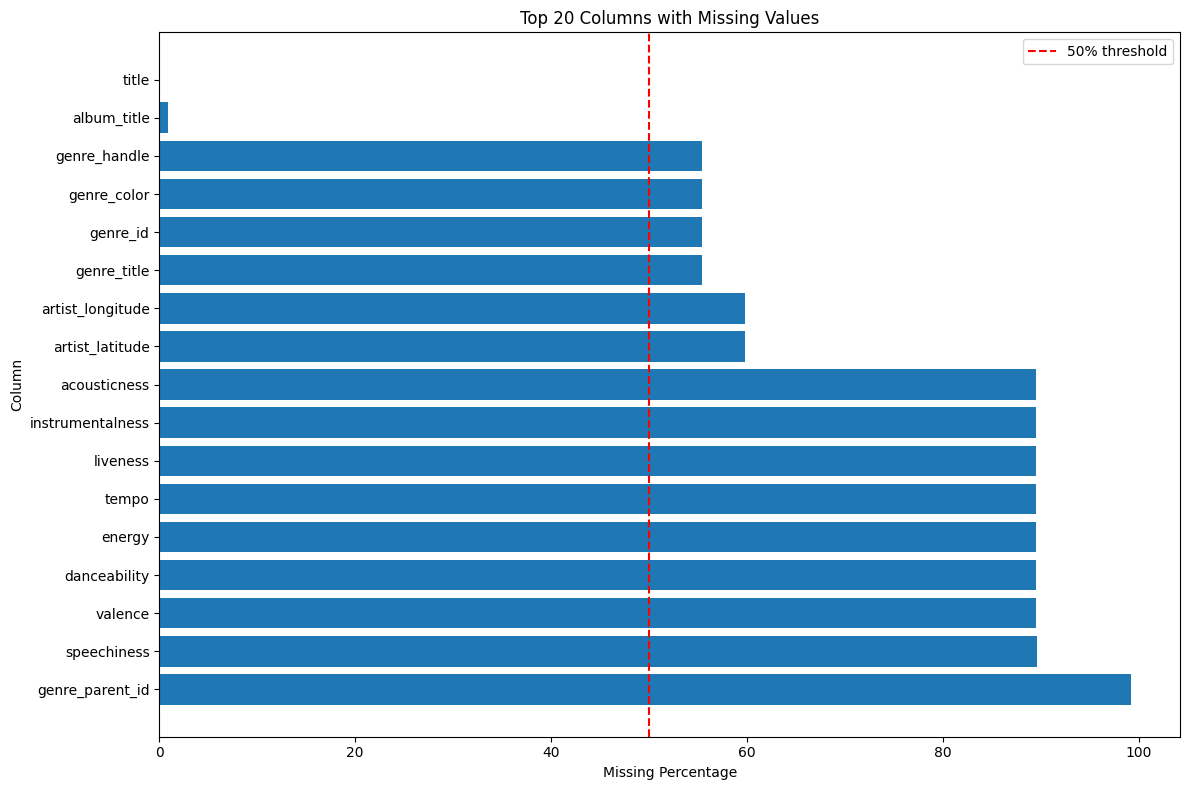

In [69]:
fig, ax = plt.subplots(figsize=(12, 8))
top_missing = missing_df.head(20)
ax.barh(top_missing.index, top_missing['missing_pct'])
ax.set_xlabel('Missing Percentage')
ax.set_ylabel('Column')
ax.set_title('Top 20 Columns with Missing Values')
ax.axvline(x=50, color='red', linestyle='--', label='50% threshold')
ax.legend()
plt.tight_layout()
plt.show()

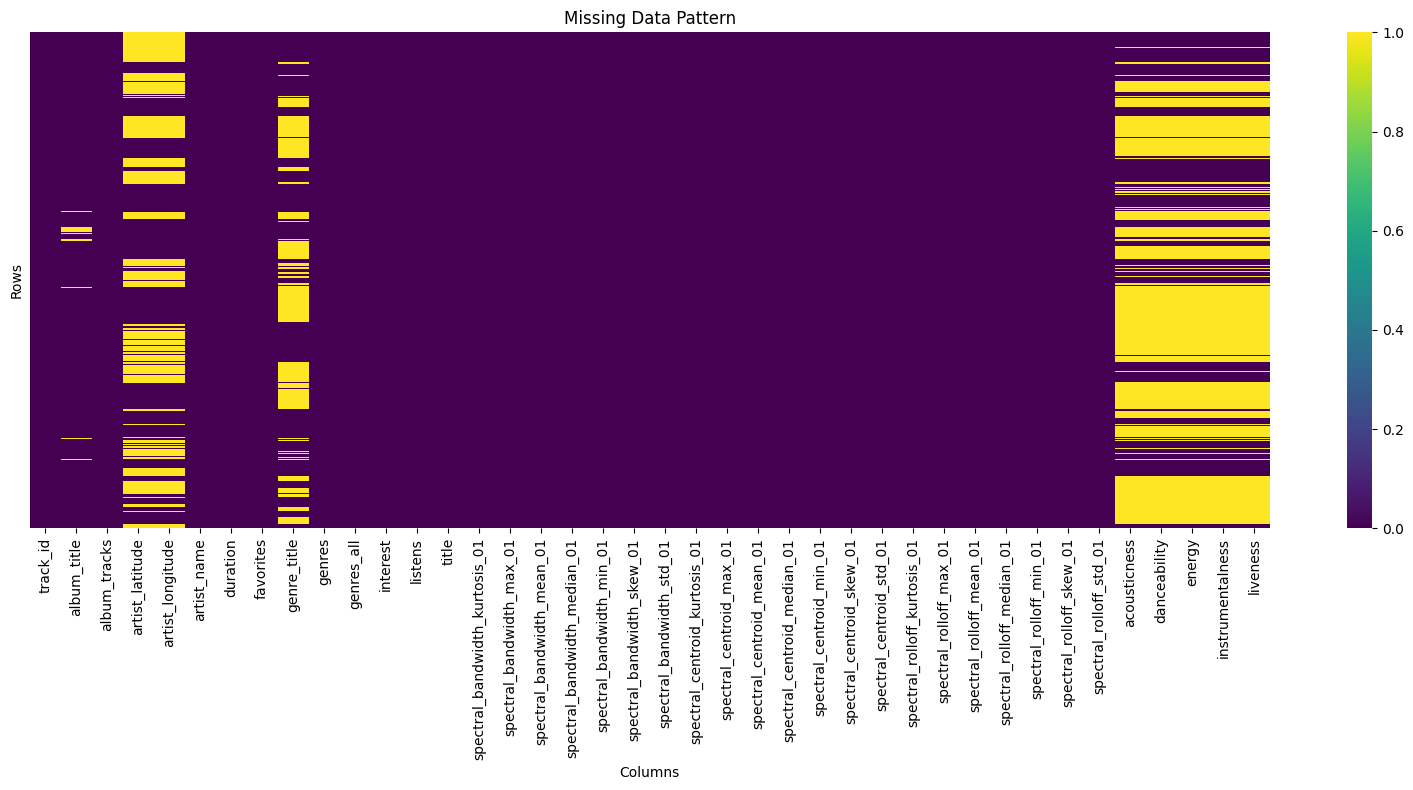

In [70]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(df.isnull().iloc[:500, :40], cbar=True, yticklabels=False, cmap='viridis', ax=ax)
ax.set_title('Missing Data Pattern')
ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
plt.tight_layout()
plt.show()

# Duplicates Check

In [71]:
print('Total duplicates:', df.duplicated().sum())
print('Duplicate track_id:', df.duplicated(subset=['track_id']).sum())

Total duplicates: 0
Duplicate track_id: 0


# Genre Distribution

In [72]:
genre_counts = df['genre_title'].value_counts()
print('Total genres:', len(genre_counts))
print('\nGenre distribution:')
genre_counts

Total genres: 16

Genre distribution:


genre_title
Rock                   12085
Experimental            9752
Electronic              8769
Hip-Hop                 3334
Folk                    2375
Pop                     2235
Instrumental            2003
International           1256
Classical               1129
Old-Time / Historic      491
Jazz                     484
Spoken                   323
Country                  163
Soul-RnB                 131
Blues                     79
Easy Listening            24
Name: count, dtype: int64

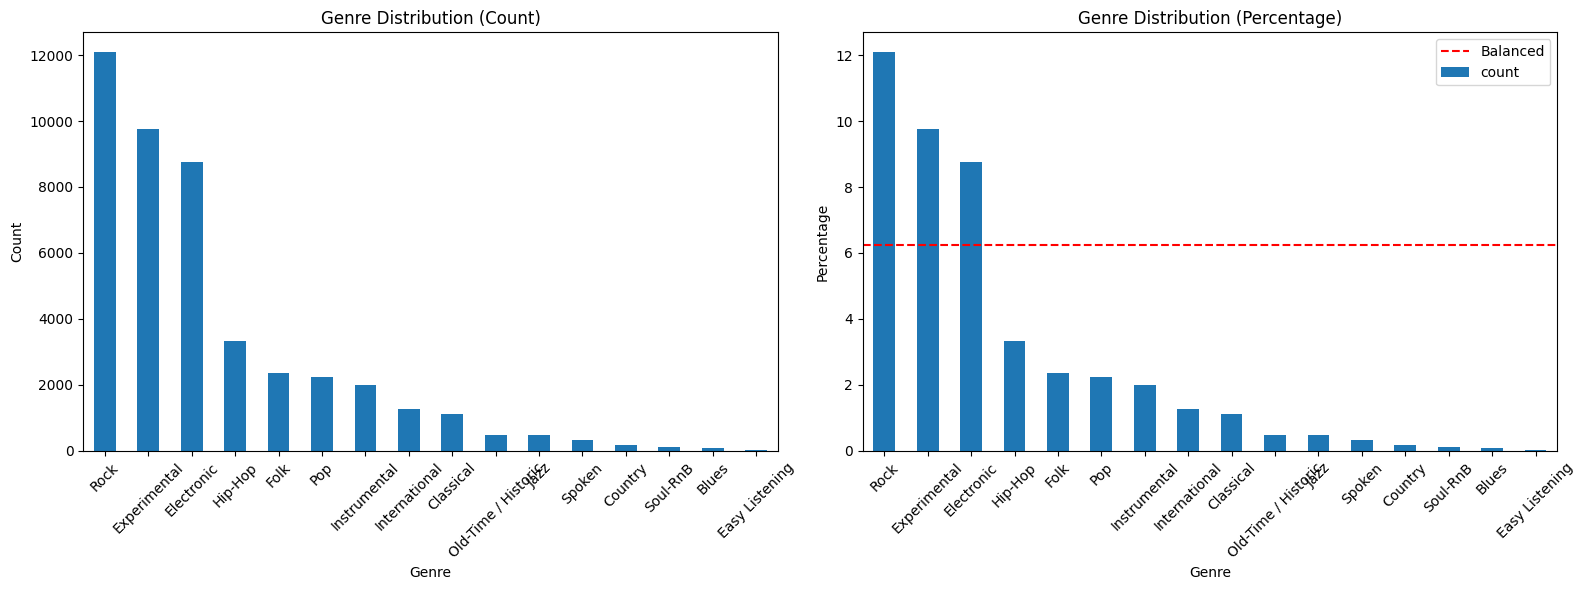

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

genre_counts.plot(kind='bar', ax=axes[0])
axes[0].set_title('Genre Distribution (Count)')
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

genre_pct = (genre_counts / len(df)) * 100
genre_pct.plot(kind='bar', ax=axes[1])
axes[1].set_title('Genre Distribution (Percentage)')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Percentage')
axes[1].tick_params(axis='x', rotation=45)
axes[1].axhline(y=100/len(genre_counts), color='red', linestyle='--', label='Balanced')
axes[1].legend()

plt.tight_layout()
plt.show()

# Duration Analysis

In [74]:
print('Duration statistics:')
print(df['duration'].describe())
print('\nMissing duration:', df['duration'].isnull().sum())

Duration statistics:
count    99995.000000
mean       278.034522
std        294.940279
min          0.000000
25%        151.000000
50%        218.000000
75%        307.000000
max      11030.000000
Name: duration, dtype: float64

Missing duration: 0


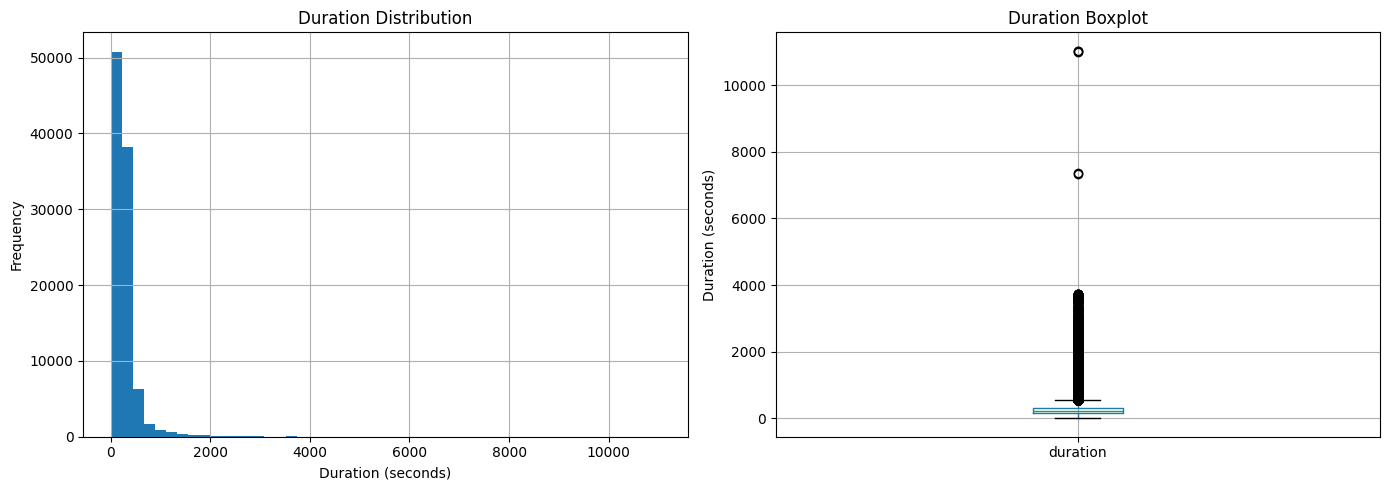

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df['duration'].dropna().hist(bins=50, ax=axes[0])
axes[0].set_title('Duration Distribution')
axes[0].set_xlabel('Duration (seconds)')
axes[0].set_ylabel('Frequency')

df.boxplot(column='duration', ax=axes[1])
axes[1].set_title('Duration Boxplot')
axes[1].set_ylabel('Duration (seconds)')

plt.tight_layout()
plt.show()

# Numeric Features Overview

In [76]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print('Total numeric columns:', len(numeric_cols))
print('\nNumeric columns:', numeric_cols)

Total numeric columns: 39

Numeric columns: ['track_id', 'album_tracks', 'artist_latitude', 'artist_longitude', 'duration', 'favorites', 'interest', 'listens', 'spectral_bandwidth_kurtosis_01', 'spectral_bandwidth_max_01', 'spectral_bandwidth_mean_01', 'spectral_bandwidth_median_01', 'spectral_bandwidth_min_01', 'spectral_bandwidth_skew_01', 'spectral_bandwidth_std_01', 'spectral_centroid_kurtosis_01', 'spectral_centroid_max_01', 'spectral_centroid_mean_01', 'spectral_centroid_median_01', 'spectral_centroid_min_01', 'spectral_centroid_skew_01', 'spectral_centroid_std_01', 'spectral_rolloff_kurtosis_01', 'spectral_rolloff_max_01', 'spectral_rolloff_mean_01', 'spectral_rolloff_median_01', 'spectral_rolloff_min_01', 'spectral_rolloff_skew_01', 'spectral_rolloff_std_01', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence', 'genre_id', 'genre_parent_id']


In [77]:
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
track_id,99995.0,84272.568048,41846.737500,1.187000e+04,47880.500000,83556.000000,121583.500000,1.553200e+05
album_tracks,99995.0,19.908645,40.510849,-1.000000e+00,7.000000,11.000000,18.000000,6.520000e+02
artist_latitude,40207.0,39.967832,18.766913,-4.587450e+01,39.271398,41.823989,50.079079,6.728601e+01
artist_longitude,40207.0,-35.443236,65.670545,-1.575269e+02,-78.868915,-72.669067,5.007986,1.752770e+02
duration,99995.0,278.034522,294.940279,0.000000e+00,151.000000,218.000000,307.000000,1.103000e+04
favorites,99995.0,3.239962,13.863871,0.000000e+00,0.000000,1.000000,3.000000,1.482000e+03
interest,99995.0,3628.631112,19578.522967,2.000000e+00,602.000000,1333.000000,3117.000000,3.293557e+06
listens,99995.0,2403.072944,8234.085292,0.000000e+00,305.000000,797.000000,2085.000000,5.432520e+05
spectral_bandwidth_kurtosis_01,99995.0,7.588260,28.517327,-1.961655e+00,-0.074174,1.396075,5.662101,3.143452e+03
spectral_bandwidth_max_01,99995.0,3544.781941,384.217742,4.695365e+02,3361.957397,3555.611572,3703.081299,5.495584e+03


# Spectral Features Analysis

Low-level audio features capturing frequency-domain characteristics.

In [82]:
# Identify spectral feature columns
spectral_cols = [col for col in df.columns if any(x in col.lower() for x in ['spectral', 'mfcc', 'chroma', 'tonnetz', 'zcr'])]

print(f'Total Spectral Features: {len(spectral_cols)}')
print(f'Categories:')
for prefix in ['spectral_centroid', 'spectral_bandwidth', 'spectral_contrast', 'spectral_rolloff', 
               'mfcc', 'chroma', 'tonnetz', 'zcr']:
    matching = [c for c in spectral_cols if prefix in c.lower()]
    if matching:
        print(f'  {prefix}: {len(matching)}')

print(f'\nFirst 10:')
print(spectral_cols[:10])

Total Spectral Features: 21
Categories:
  spectral_centroid: 7
  spectral_bandwidth: 7
  spectral_rolloff: 7

First 10:
['spectral_bandwidth_kurtosis_01', 'spectral_bandwidth_max_01', 'spectral_bandwidth_mean_01', 'spectral_bandwidth_median_01', 'spectral_bandwidth_min_01', 'spectral_bandwidth_skew_01', 'spectral_bandwidth_std_01', 'spectral_centroid_kurtosis_01', 'spectral_centroid_max_01', 'spectral_centroid_mean_01']


In [83]:
if len(spectral_cols) > 0:
    spectral_stats = df[spectral_cols].describe().T
    spectral_stats['range'] = spectral_stats['max'] - spectral_stats['min']
    spectral_stats['coef_var'] = (spectral_stats['std'] / spectral_stats['mean'].abs()) * 100
    
    print('Spectral Features Statistics:')
    print(spectral_stats[['mean', 'std', 'min', 'max', 'range', 'coef_var']].head(15))
    
    high_var = spectral_stats[spectral_stats['coef_var'] > 100].sort_values('coef_var', ascending=False)
    print(f'\nHigh Variability Features: {len(high_var)}')
    print(high_var[['mean', 'std', 'coef_var']].head(10))

Spectral Features Statistics:
                                       mean          std         min  \
spectral_bandwidth_kurtosis_01     7.588260    28.517327   -1.961655   
spectral_bandwidth_max_01       3544.781941   384.217742  469.536530   
spectral_bandwidth_mean_01      1408.089600   463.258008   20.130140   
spectral_bandwidth_median_01    1362.269289   509.942550    0.000000   
spectral_bandwidth_min_01        309.218658   322.982338    0.000000   
spectral_bandwidth_skew_01         1.083953     1.847947  -22.545801   
spectral_bandwidth_std_01        458.660662   178.582514   28.072506   
spectral_centroid_kurtosis_01     26.139062   104.120438   -1.947677   
spectral_centroid_max_01        5640.080478  1109.671918  273.399445   
spectral_centroid_mean_01       1177.314473   532.688615   16.999098   
spectral_centroid_median_01     1063.670506   549.965545    0.000000   
spectral_centroid_min_01         151.146755   204.261251    0.000000   
spectral_centroid_skew_01         

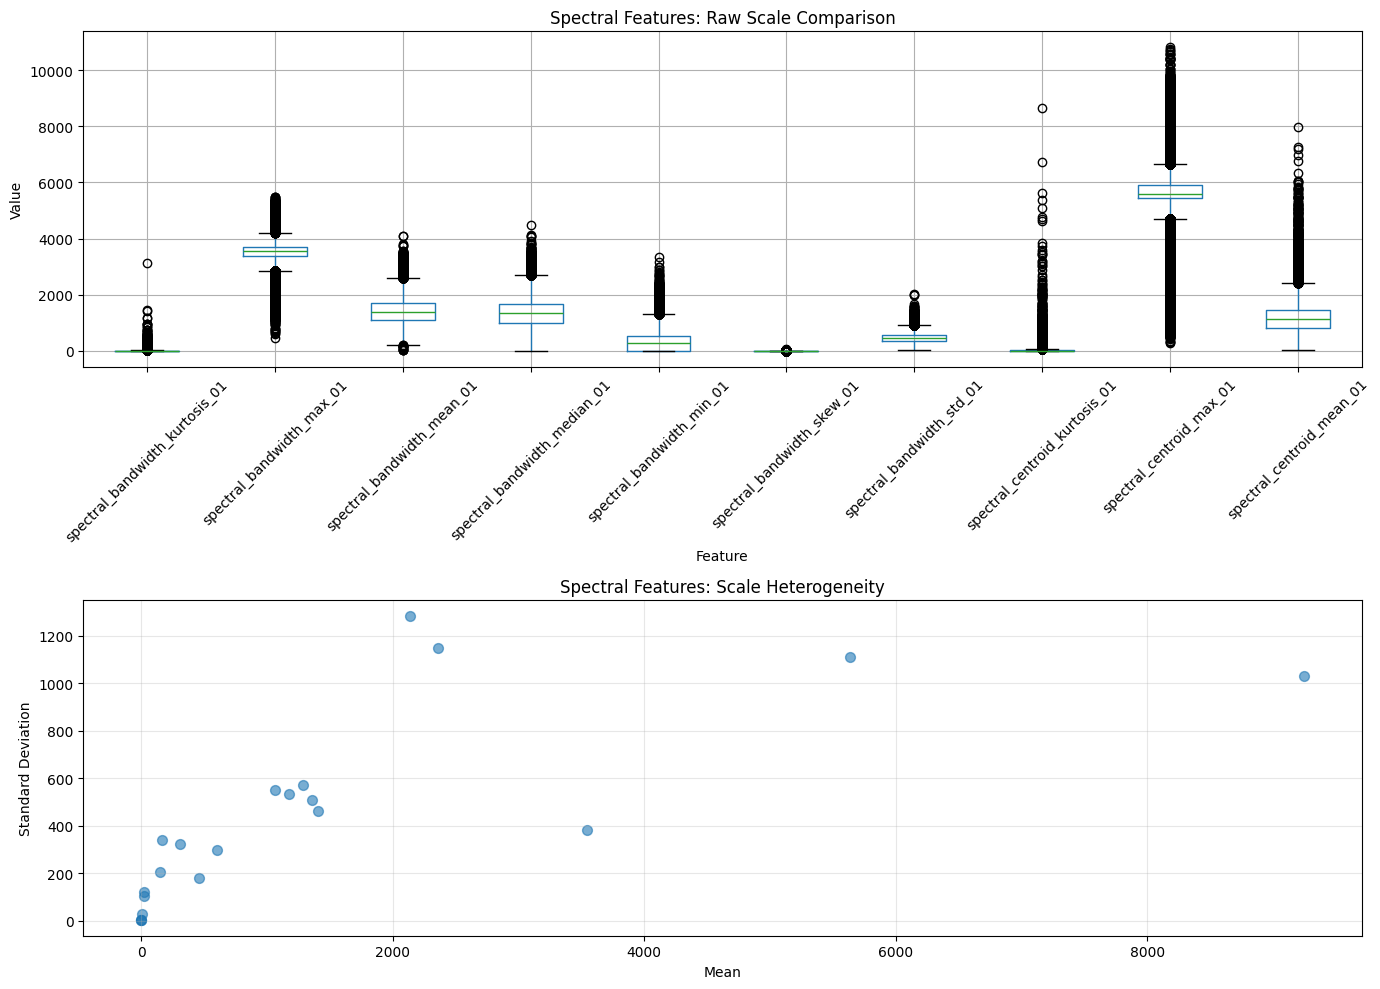

In [84]:
if len(spectral_cols) > 0:
    sample_spectral = spectral_cols[:10] if len(spectral_cols) >= 10 else spectral_cols
    
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    df[sample_spectral].boxplot(ax=axes[0], rot=45)
    axes[0].set_title('Spectral Features: Raw Scale Comparison')
    axes[0].set_ylabel('Value')
    axes[0].set_xlabel('Feature')
    
    axes[1].scatter(spectral_stats['mean'], spectral_stats['std'], alpha=0.6, s=50)
    axes[1].set_xlabel('Mean')
    axes[1].set_ylabel('Standard Deviation')
    axes[1].set_title('Spectral Features: Scale Heterogeneity')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


Echonest Features:
                        mean        std           min         max       range
acousticness        0.489379   0.384781  9.491000e-07    0.995796    0.995796
danceability        0.506784   0.189812  5.143514e-02    0.968645    0.917210
energy              0.541650   0.274799  2.028170e-05    0.999964    0.999943
instrumentalness    0.628853   0.366879  0.000000e+00    0.998016    0.998016
liveness            0.185575   0.153461  2.591638e-02    0.980330    0.954414
speechiness         0.098309   0.133848  2.232367e-02    0.966177    0.943854
tempo             122.447143  34.926595  0.000000e+00  251.072000  251.072000
valence             0.449579   0.276176  8.694941e-03    0.999990    0.991295


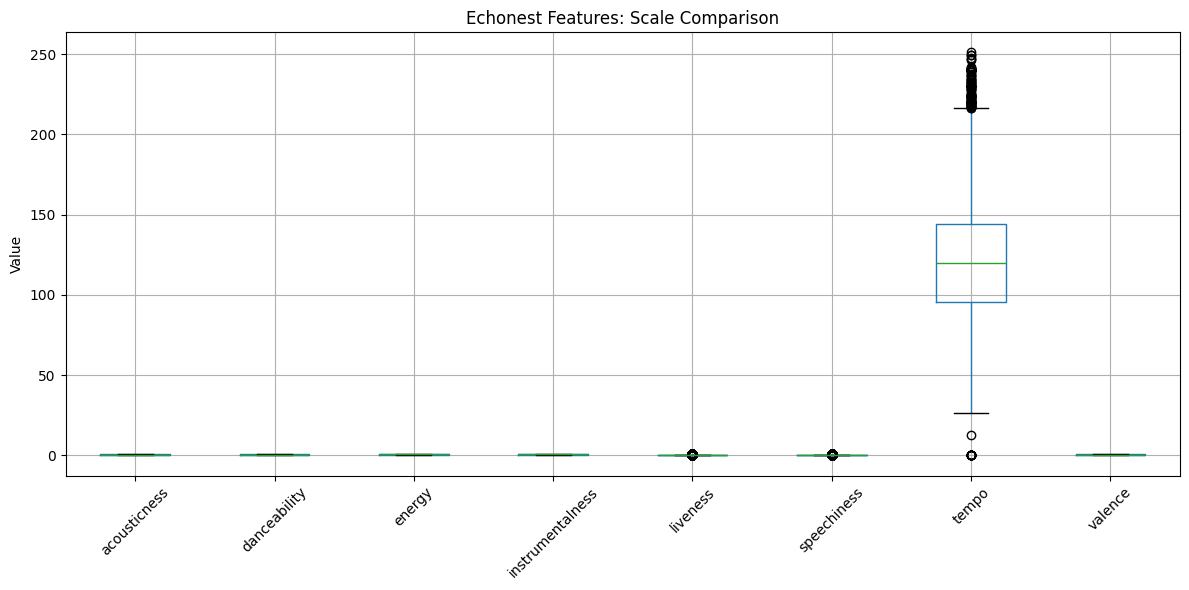

In [85]:
echonest_cols = [col for col in df.columns if any(x in col.lower() for x in ['acousticness', 
'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence'])]

if len(echonest_cols) > 0:
    echonest_stats = df[echonest_cols].describe().T
    echonest_stats['range'] = echonest_stats['max'] - echonest_stats['min']
    
    print('\nEchonest Features:')
    print(echonest_stats[['mean', 'std', 'min', 'max', 'range']].head(10))
    
    fig, ax = plt.subplots(figsize=(12, 6))
    df[echonest_cols[:8]].boxplot(ax=ax, rot=45)
    ax.set_title('Echonest Features: Scale Comparison')
    ax.set_ylabel('Value')
    plt.tight_layout()
    plt.show()

# Correlation Analysis

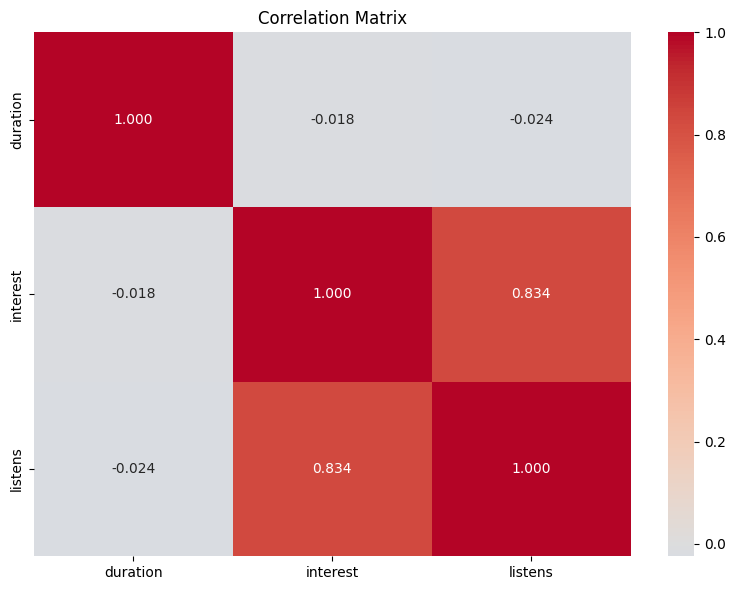

In [ ]:
key_cols = ['duration', 'interest', 'listens']
available = [c for c in key_cols if c in df.columns]

if len(available) > 1:
    corr = df[available].corr()
    
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(corr, annot=True, fmt='.3f', cmap='coolwarm', center=0, ax=ax)
    ax.set_title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

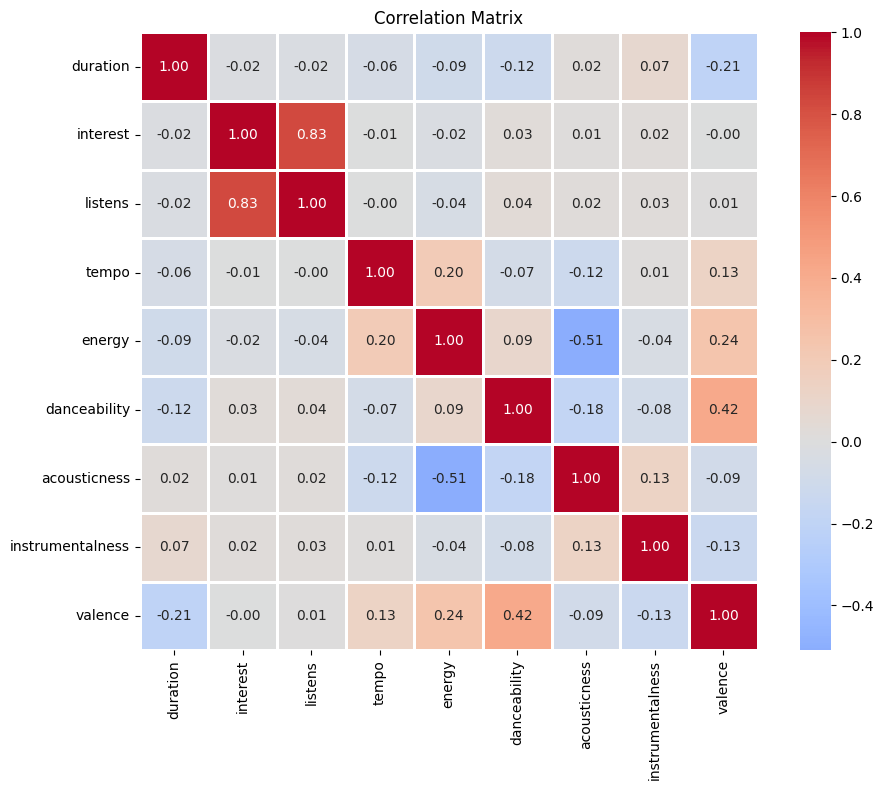

In [ ]:
main_features = ['duration', 'interest', 'listens', 'tempo', 'energy', 'danceability', 
                 'acousticness', 'instrumentalness', 'valence']
available_features = [col for col in main_features if col in df.columns]

if len(available_features) > 1:
    corr_matrix = df[available_features].corr()
    
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
                square=True, linewidths=1, ax=ax)
    ax.set_title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

# Feature vs Genre Analysis

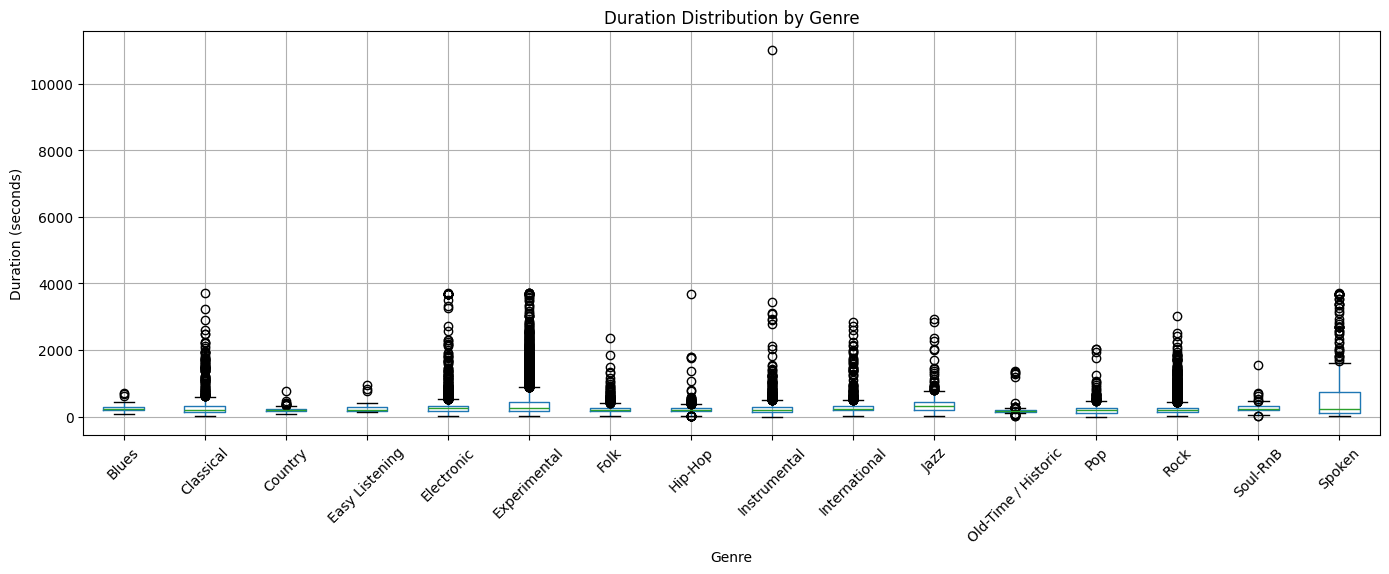

In [ ]:
if 'duration' in df.columns and 'genre_title' in df.columns:
    fig, ax = plt.subplots(figsize=(14, 6))
    df.boxplot(column='duration', by='genre_title', ax=ax, rot=45)
    ax.set_title('Duration Distribution by Genre')
    ax.set_xlabel('Genre')
    ax.set_ylabel('Duration (seconds)')
    plt.suptitle('')
    plt.tight_layout()
    plt.show()

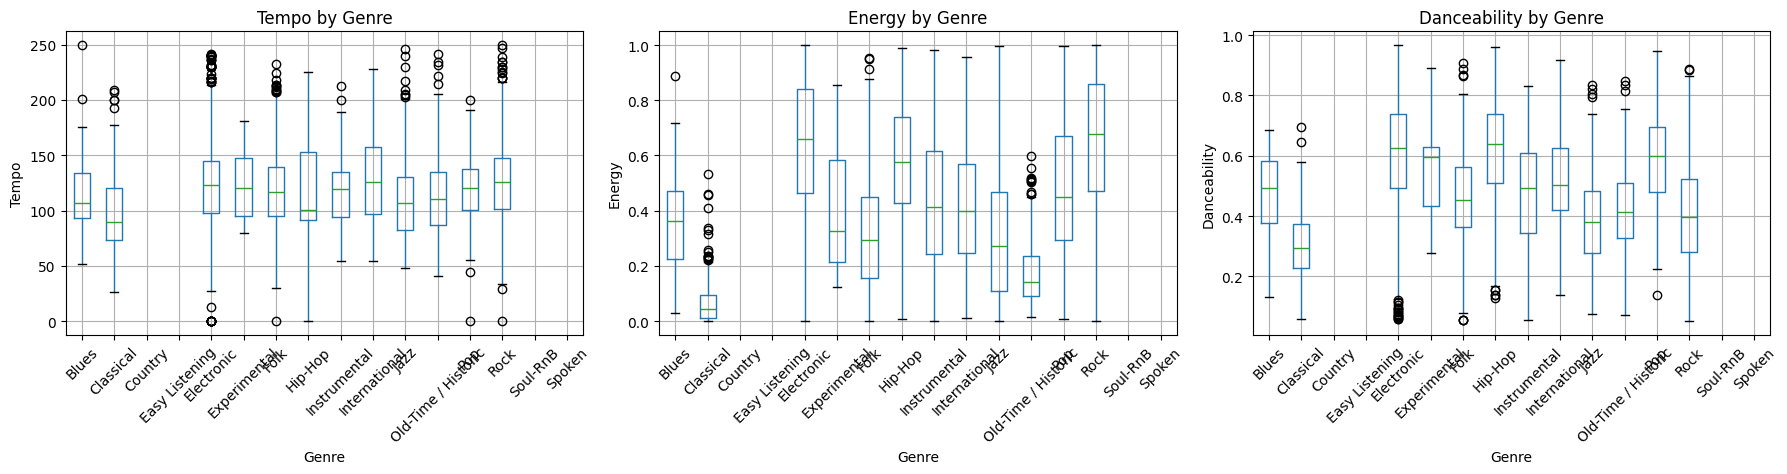

In [ ]:
audio_features = ['tempo', 'energy', 'danceability']
available_audio = [col for col in audio_features if col in df.columns]

if len(available_audio) >= 2 and 'genre_title' in df.columns:
    fig, axes = plt.subplots(1, len(available_audio), figsize=(18, 5))
    
    if len(available_audio) == 1:
        axes = [axes]
    
    for i, feature in enumerate(available_audio):
        df.boxplot(column=feature, by='genre_title', ax=axes[i], rot=45)
        axes[i].set_title(f'{feature.capitalize()} by genre')
        axes[i].set_xlabel('Genre')
        axes[i].set_ylabel(feature.capitalize())
    
    plt.suptitle('')
    plt.tight_layout()
    plt.show()

# Data Cleaning Strategy

# Feature Engineering

In [ ]:
if 'duration' in df.columns:
    df['duration_minutes'] = df['duration'] / 60
    df['is_short_track'] = (df['duration'] < 120).astype(int)
    df['is_long_track'] = (df['duration'] > 300).astype(int)

if 'interest' in df.columns and 'listens' in df.columns:
    df['popularity_ratio'] = df['listens'] / (df['interest'] + 1)
    df['has_engagement'] = ((df['interest'] > 0) | (df['listens'] > 0)).astype(int)

if 'energy' in df.columns and 'valence' in df.columns:
    df['energy_valence_product'] = df['energy'] * df['valence']

if 'tempo' in df.columns:
    df['tempo_category'] = pd.cut(df['tempo'], bins=[0, 90, 120, 150, 300], 
                                   labels=['slow', 'moderate', 'fast', 'very_fast'])

print('New features created:')
new_features = ['duration_minutes', 'is_short_track', 'is_long_track', 
                'popularity_ratio', 'has_engagement', 'energy_valence_product', 'tempo_category']
existing_new = [f for f in new_features if f in df.columns]
print(existing_new)

New features created:
['duration_minutes', 'is_short_track', 'is_long_track', 'popularity_ratio', 'has_engagement', 'energy_valence_product', 'tempo_category']


In [ ]:
engineered_features = ['duration_minutes', 'is_short_track', 'popularity_ratio', 'energy_valence_product']
available_eng = [f for f in engineered_features if f in df.columns]

if len(available_eng) > 0:
    print('Engineered features statistics:')
    print(df[available_eng].describe())

Engineered features statistics:
       duration_minutes  is_short_track  popularity_ratio  \
count      99995.000000    99995.000000      99995.000000   
mean           4.633909        0.157218          0.637259   
std            4.915671        0.364008          0.219353   
min            0.000000        0.000000          0.000000   
25%            2.516667        0.000000          0.495654   
50%            3.633333        0.000000          0.697479   
75%            5.116667        0.000000          0.809086   
max          183.833333        1.000000          3.895899   

       energy_valence_product  
count            1.053200e+04  
mean             2.618726e-01  
std              2.198708e-01  
min              1.763482e-07  
25%              7.191529e-02  
50%              2.135550e-01  
75%              4.063446e-01  
max              9.849276e-01  


In [ ]:
drop_threshold = 60
cols_to_drop = missing_df[missing_df['missing_pct'] > drop_threshold].index.tolist()
print(f'Columns to drop (>{drop_threshold}% missing):', len(cols_to_drop))
print(cols_to_drop)

Columns to drop (>60% missing): 9
['genre_parent_id', 'speechiness', 'valence', 'danceability', 'energy', 'tempo', 'liveness', 'instrumentalness', 'acousticness']


In [ ]:
df_clean = df.drop(columns=cols_to_drop)
print('Shape after dropping columns:', df_clean.shape)

Shape after dropping columns: (99995, 38)


In [ ]:
# Remove rows where genre_title is empty (null/NaN)
rows_before = len(df_clean)
df_clean = df_clean.dropna(subset=['genre_title'])
rows_after = len(df_clean)
print(f'Rows dropped (missing genre_title): {rows_before - rows_after}')
print(f'Remaining rows: {rows_after}')

Rows dropped (missing genre_title): 55362
Remaining rows: 44633


# Post-Cleaning Analysis

In [ ]:
print('Dataset shape after cleaning:', df_clean.shape)
print('Missing values:', df_clean.isnull().sum().sum())
print('\nRemaining features:', df_clean.columns.tolist())

Dataset shape after cleaning: (44633, 38)
Missing values: 54091

Remaining features: ['track_id', 'album_title', 'album_tracks', 'artist_latitude', 'artist_longitude', 'artist_name', 'duration', 'favorites', 'genre_title', 'genres', 'genres_all', 'interest', 'listens', 'title', 'spectral_bandwidth_kurtosis_01', 'spectral_bandwidth_max_01', 'spectral_bandwidth_mean_01', 'spectral_bandwidth_median_01', 'spectral_bandwidth_min_01', 'spectral_bandwidth_skew_01', 'spectral_bandwidth_std_01', 'spectral_centroid_kurtosis_01', 'spectral_centroid_max_01', 'spectral_centroid_mean_01', 'spectral_centroid_median_01', 'spectral_centroid_min_01', 'spectral_centroid_skew_01', 'spectral_centroid_std_01', 'spectral_rolloff_kurtosis_01', 'spectral_rolloff_max_01', 'spectral_rolloff_mean_01', 'spectral_rolloff_median_01', 'spectral_rolloff_min_01', 'spectral_rolloff_skew_01', 'spectral_rolloff_std_01', 'genre_id', 'genre_color', 'genre_handle']


In [ ]:
missing_clean = df_clean.isnull().sum()
missing_pct_clean = (missing_clean / len(df_clean)) * 100
missing_clean_df = pd.DataFrame({
    'missing_count': missing_clean,
    'missing_pct': missing_pct_clean
})
missing_clean_df = missing_clean_df[missing_clean_df['missing_count'] > 0].sort_values('missing_pct', ascending=False)

if len(missing_clean_df) > 0:
    print('Remaining missing data:')
    print(missing_clean_df)
else:
    print('No missing data after cleaning')

Remaining missing data:
                  missing_count  missing_pct
artist_latitude           26905    60.280510
artist_longitude          26905    60.280510
album_title                 280     0.627339
title                         1     0.002240


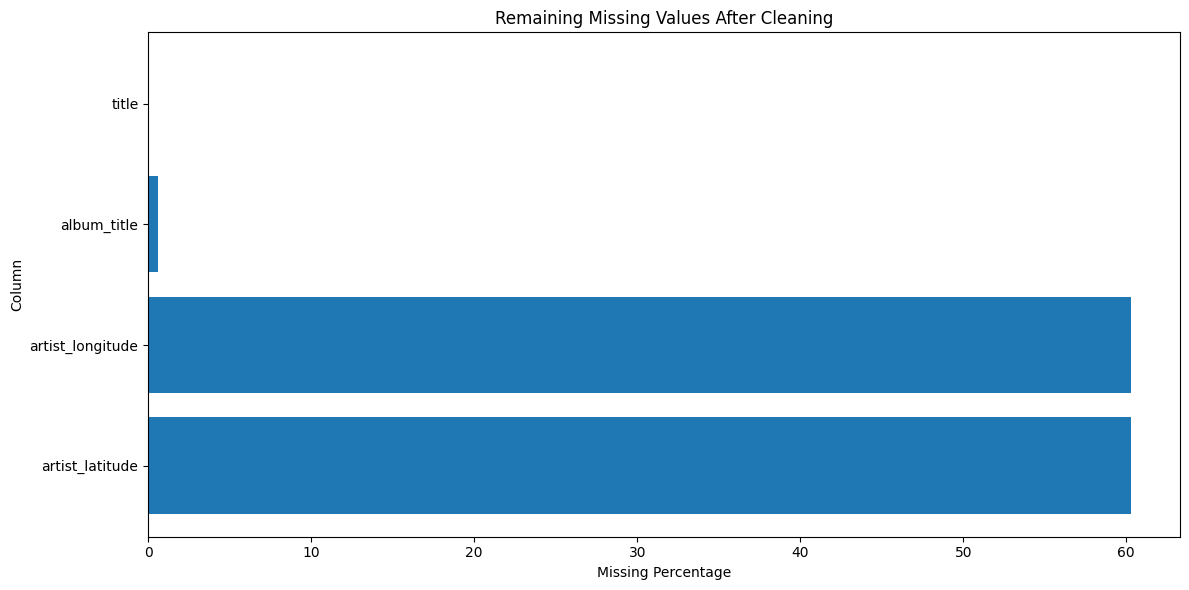

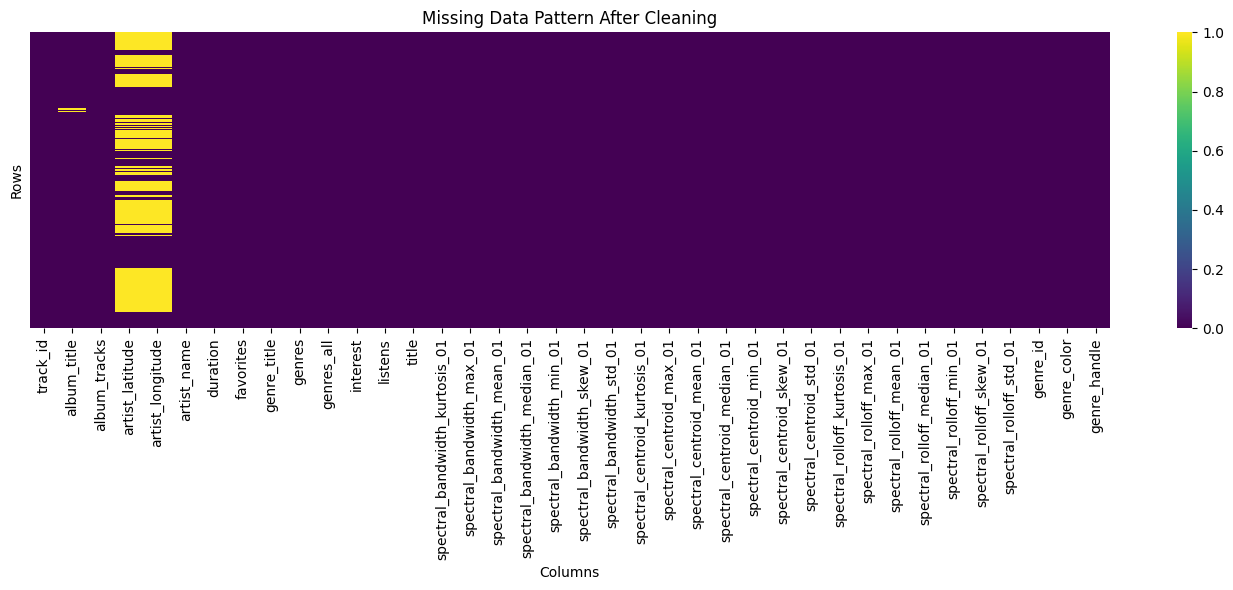

In [ ]:
if len(missing_clean_df) > 0:
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.barh(missing_clean_df.index, missing_clean_df['missing_pct'])
    ax.set_xlabel('Missing Percentage')
    ax.set_ylabel('Column')
    ax.set_title('Remaining Missing Values After Cleaning')
    plt.tight_layout()
    plt.show()
    
    fig, ax = plt.subplots(figsize=(14, 6))
    sns.heatmap(df_clean.isnull().iloc[:500], cbar=True, yticklabels=False, cmap='viridis', ax=ax)
    ax.set_title('Missing Data Pattern After Cleaning')
    ax.set_xlabel('Columns')
    ax.set_ylabel('Rows')
    plt.tight_layout()
    plt.show()

In [ ]:
print('Genre distribution after cleaning:')
print(df_clean['genre_title'].value_counts())
print('\nGenre counts:', df_clean['genre_title'].nunique())

Genre distribution after cleaning:
genre_title
Rock                   12085
Experimental            9752
Electronic              8769
Hip-Hop                 3334
Folk                    2375
Pop                     2235
Instrumental            2003
International           1256
Classical               1129
Old-Time / Historic      491
Jazz                     484
Spoken                   323
Country                  163
Soul-RnB                 131
Blues                     79
Easy Listening            24
Name: count, dtype: int64

Genre counts: 16


# Class Imbalance Analysis

Class weights for handling imbalanced genre distribution.

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

genre_values = df_clean['genre_title'].values
unique_genres = np.unique(genre_values)
class_weights = compute_class_weight('balanced', classes=unique_genres, y=genre_values)
class_weight_dict = dict(zip(unique_genres, class_weights))
sorted_weights = sorted(class_weight_dict.items(), key=lambda x: x[1], reverse=True)

print('Top 10 minority classes:')
for genre, weight in sorted_weights[:10]:
    count = (df_clean['genre_title'] == genre).sum()
    print(f'{genre:20s}: weight={weight:.3f}, count={count}')

print('\n...')

print('\nBottom 10 majority classes:')
for genre, weight in sorted_weights[-10:]:
    count = (df_clean['genre_title'] == genre).sum()
    print(f'{genre:20s}: weight={weight:.3f}, count={count}')

Top 10 minority classes:
Easy Listening      : weight=116.232, count=24
Blues               : weight=35.311, count=79
Soul-RnB            : weight=21.294, count=131
Country             : weight=17.114, count=163
Spoken              : weight=8.636, count=323
Jazz                : weight=5.764, count=484
Old-Time / Historic : weight=5.681, count=491
Classical           : weight=2.471, count=1129
International       : weight=2.221, count=1256
Instrumental        : weight=1.393, count=2003

...

Bottom 10 majority classes:
Old-Time / Historic : weight=5.681, count=491
Classical           : weight=2.471, count=1129
International       : weight=2.221, count=1256
Instrumental        : weight=1.393, count=2003
Pop                 : weight=1.248, count=2235
Folk                : weight=1.175, count=2375
Hip-Hop             : weight=0.837, count=3334
Electronic          : weight=0.318, count=8769
Experimental        : weight=0.286, count=9752
Rock                : weight=0.231, count=12085


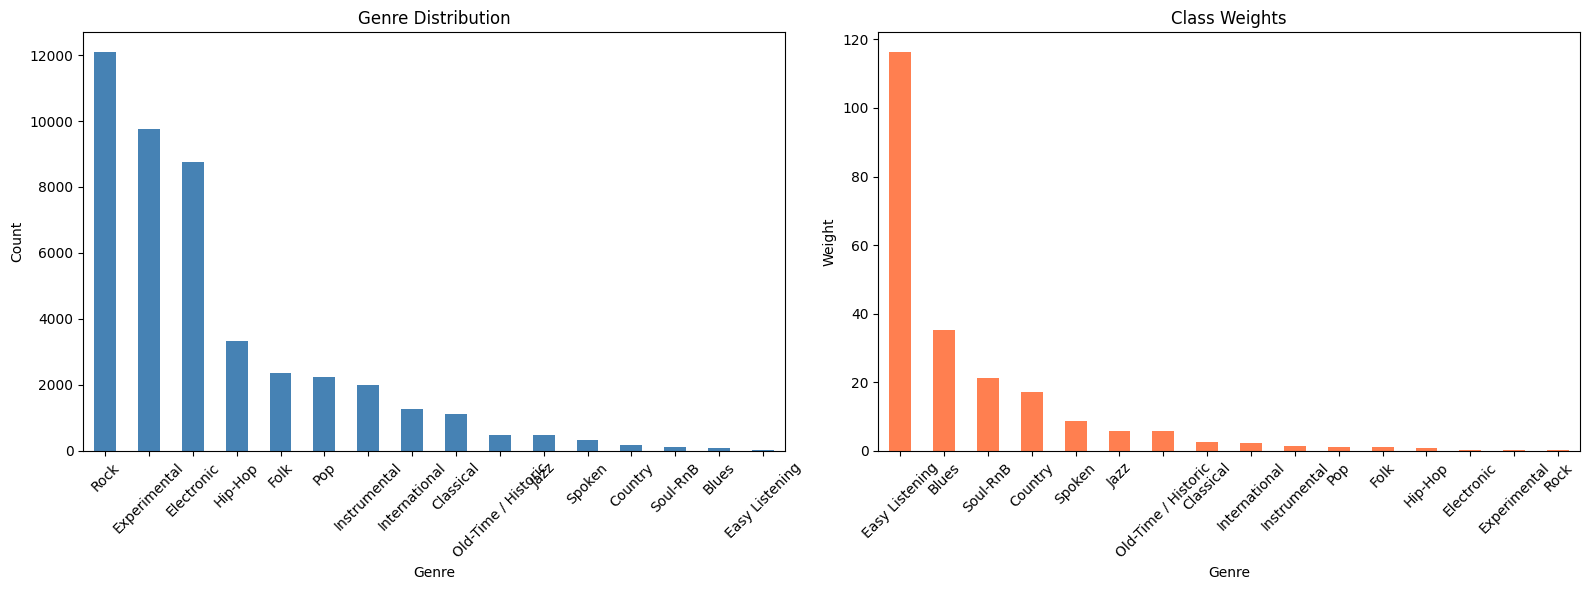

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

genre_counts = df_clean['genre_title'].value_counts()
genre_counts.plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Genre Distribution')
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

weights_series = pd.Series(class_weight_dict).sort_values(ascending=False)
weights_series.plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Class Weights')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Weight')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Class Weights Usage

**Random Forest:**
```
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
```

**Logistic Regression:**
```
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', max_iter=1000)
```

**XGBoost:**
```
import xgboost as xgb
sample_weights = np.array([class_weight_dict[genre] for genre in y_train])
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train, sample_weight=sample_weights)
```

In [ ]:
import json

class_weight_dict_serializable = {str(k): float(v) for k, v in class_weight_dict.items()}

with open('../DataBase/processed/class_weights.json', 'w') as f:
    json.dump(class_weight_dict_serializable, f, indent=2)

print('Class weights saved')
print(f'Total classes: {len(class_weight_dict)}')
print(f'Weight range: {min(class_weights):.3f} to {max(class_weights):.3f}')

Class weights saved
Total classes: 16
Weight range: 0.231 to 116.232


In [ ]:
missing_after = df_clean.isnull().sum()
missing_after = missing_after[missing_after > 0]
if len(missing_after) > 0:
    print('Columns still with missing values:')
    print(missing_after)
else:
    print('No missing values remaining')

Columns still with missing values:
album_title           280
artist_latitude     26905
artist_longitude    26905
title                   1
dtype: int64


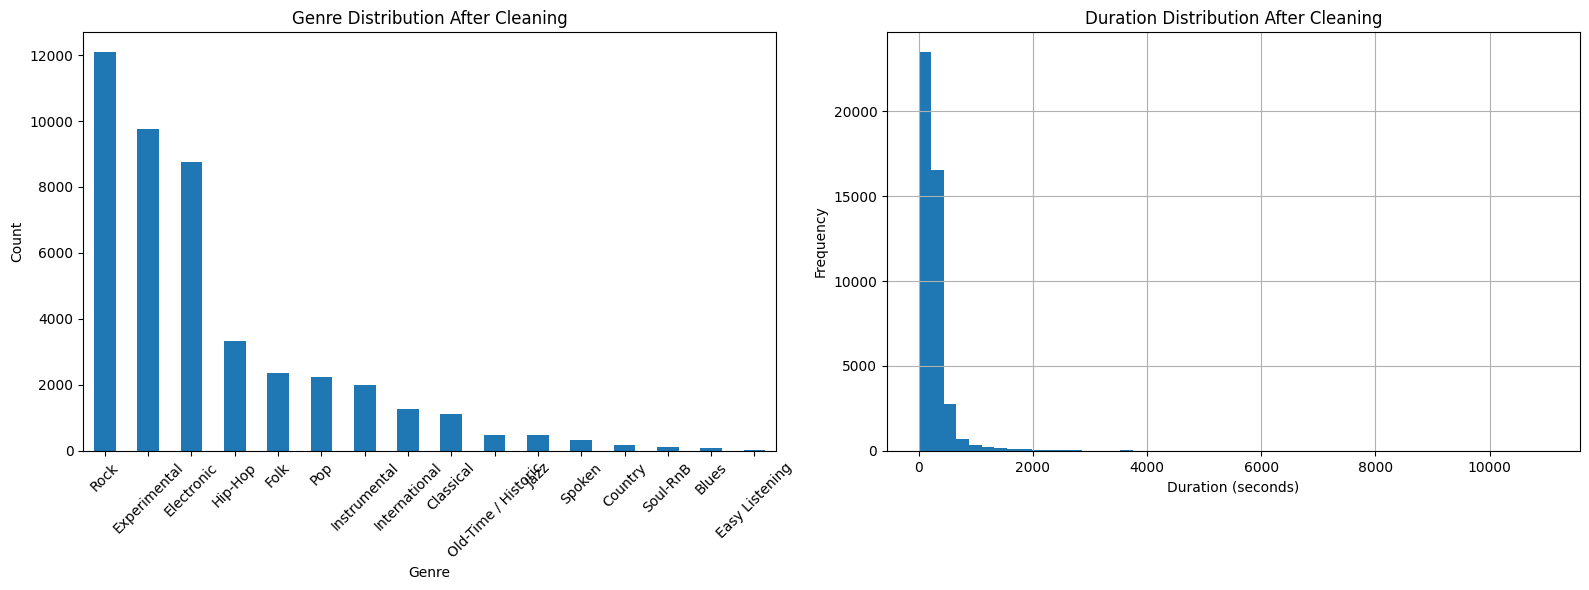

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

df_clean['genre_title'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Genre Distribution After Cleaning')
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

if 'duration' in df_clean.columns:
    df_clean['duration'].hist(bins=50, ax=axes[1])
    axes[1].set_title('Duration Distribution After Cleaning')
    axes[1].set_xlabel('Duration (seconds)')
    axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
print('Missing values after cleaning:', df_clean.isnull().sum().sum())
print('Final shape:', df_clean.shape)

Missing values after cleaning: 54091
Final shape: (44633, 38)


# Train Test Split

In [ ]:
train_df, test_df = train_test_split(df_clean, test_size=0.2, random_state=42, stratify=df_clean['genre_title'])
print('Train shape:', train_df.shape)
print('Test shape:', test_df.shape)

Train shape: (35706, 38)
Test shape: (8927, 38)


In [ ]:
df_clean.to_csv('../DataBase/processed/merged_data.csv', index=False)
train_df.to_csv('../DataBase/processed/train_data.csv', index=False)
test_df.to_csv('../DataBase/processed/test_data.csv', index=False)
print('Data saved: merged_data.csv, train_data.csv, test_data.csv')

Data saved
